# Time Series Part 2
This week's material provides a treatment for missing data, a discussion of stationary processes, and autoregressive models 

<br>- Step 0) Load Libraries 
<br>- Step 1) Relevant Functions
<br>- Step 2) Load Data
<br>- Step 3) Curation of Data
<br>- Step 4) Display Weight, Imputed Weight, and both 
<br>- Step 5) Display Rolling mean and standard deviation along with data
<br>- Step 6) Implement Dicky-Fuller Hypothesis Test
<br>- Step 7) Find the log of the weight and the rolling mean & std
<br>- Step 8) Remove Moving Average & Plot
<br>- Step 9) Methods to view autocorrelation
<br>- Step 10) Autoregressive Model
<br>- Step 11) Fit Constant, Linear, and Exponential lines
<br>- Step 12) Graph AR14, Imputed,Constant, Linear, and Exponential lines

### Step 0) Load Libraries

In [1]:
##-------------------------------------
## Step 0) Load Libraries
##-------------------------------------
##------------------------------------------------
## ~~ Manipulation
## Array Manipulation
import numpy as np                       
## Data Frame Manipulation
import pandas as pd 
## Change Directory in Python
import os                              
##------------------------------------------------
##------------------------------------------------
## ~~ Visualization
## Plot
#from matplotlib.pylab as plt  
from matplotlib.pyplot import *        
%matplotlib inline
## Dimensions of Image
rcParams['figure.figsize'] = 10, 6 
## Plot Time Series Autocorrelation
from pandas.plotting import autocorrelation_plot, lag_plot
from statsmodels.graphics.tsaplots import plot_acf

##------------------------------------------------
##------------------------------------------------
## ~~ Date Manipulation
from datetime import datetime
##------------------------------------------------
##------------------------------------------------
## ~~ Date Manipulation
from datetime import datetime
##------------------------------------------------
##------------------------------------------------
## ~~ Statistical Models
## Dickey-Fuller Hypothesis test for Autocorrelation
from statsmodels.tsa.stattools import adfuller
## AutoRegressive Models
from statsmodels.tsa.ar_model import AR
## Fit Linear and Exponential Trend Lines
from scipy.optimize import curve_fit   
##------------------------------------------------
##------------------------------------------------
## ~~ Miscellaneous
## Generate random numbers
import random
## Metrics Mean Square Error
from sklearn.metrics import mean_squared_error
##------------------------------------------------

### Step 1)  Relevant Functions

In [2]:
##-------------------------------------
## Step 1) Relevant Functions
##-------------------------------------
def new_weight_calculate(x_after, x_before,window_number,after_percent):
    """
    Function Name: new_weight_calculate
    Input: future list, past list, windom size, future percent
    Output: new weight
    Purpose: calculate new weight based on the future, the past and a random effect
    """
    
    ## Determine the percent that the before weight will impact new value
    before_percent = 1 - after_percent
    
    ## Remove 'nan' from list
    x_after_no_nan = [x for x in x_after  if  str(x) != 'nan']
    x_before_no_nan = [x for x in x_before  if  str(x) != 'nan']

    ## Create Appropriate window**
    x_after_na_window = x_after_no_nan[:window_number]
    x_before_na_window = x_before_no_nan[-window_number:]

    ## Calculate before effect
    before_effect = before_percent*np.mean(x_before_na_window)

    ## Calculate after effect
    after_effect = after_percent*np.mean(x_after_na_window)

    ## Calculate Random effect
    random_effect = random.uniform(-0.5, 0.5)
    
    ## Determine the new weight based on after, before and random
    new_weight = after_effect + before_effect + random_effect
    return(new_weight)

def impute_missing(x,window_number,after_percent):
    """
    Function Name: impute_missing
    Input: list, size of window, percent of future
    Output: list with imputed values
    Purpose: Ability to impute based on future and past values
    """
    ## Turn series into list
    x = x.tolist()
    ## Loop over entire list to modify NANs
    for i in range(len(x)):
        ## Determine if value is nan
        if np.isnan(x[i]) == True:
            ## Look before nan value
            x_before = x[:i]
            ## Look after nan value
            x_after = x[(i+1):]
            ## Use before and after nan value to determine 
            x[i] = new_weight_calculate(x_after,
                                        x_before,
                                        window_number,
                                        after_percent)
    return(x)



def expo_func(x, a, c, d):
    """  
    Function Name: expo_func
    Input: data and parameters of a exponential curve
    Output: output of an exponential curve
    Purpose: Fit an exponential curve to data
    """
    return a*np.exp(-c*x)+d

def line_func(x, a, d):
    """
    Function Name: line_func
    Input: data and parameters of a linear curve
    Output: output of an linear curve
    Purpose:  Fit an linear curve to data
    """
    return a*x+ d


### Step 2) Load Data

In [3]:
##-------------------------------------
## Step 2) Load Data
##-------------------------------------
default_path = 'C:/Users/james/OneDrive/Documents/Important_Files/Fitness Analysis'
os.chdir(default_path)
weight = pd.read_csv('weight_eman.csv',parse_dates=['Date'])


### Step 3) Curation of Data

In [4]:
##-------------------------------------
## Step 3) Curation of Data
##-------------------------------------
## Change Timestamp into datetime
weight['Date'] = pd.to_datetime(weight['Date'], 
                                infer_datetime_format=True)
## Turn 'Date' into index
weight = weight.set_index(['Date'])


## Impute Missing weight Values
weight['Weight_Imputed'] = impute_missing(weight['Weight'],10,0.75)

### Step 4) Display Weight, Imputed Weight, and both  

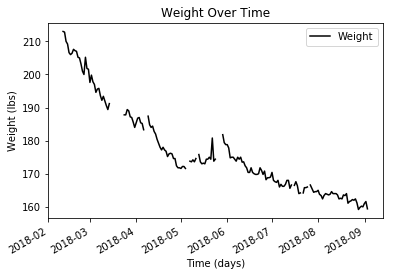

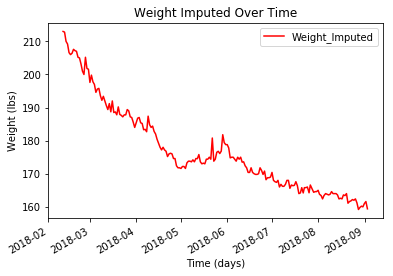

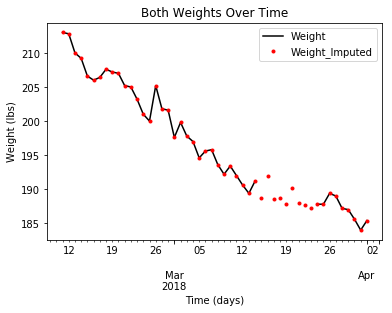

In [5]:
##-------------------------------------
## Step 4) Display Weight, Imputed Weight, and both  
##-------------------------------------
ax1 =  weight.plot(y='Weight',
                   title = 'Weight Over Time',
                   color='k')
ax1.set_xlabel('Time (days)')
ax1.set_ylabel('Weight (lbs)')
savefig('just_weight.png')

ax2 =  weight.plot(y='Weight_Imputed',
                   title = 'Weight Imputed Over Time',
                   color='red')
ax2.set_xlabel('Time (days)')
ax2.set_ylabel('Weight (lbs)')
savefig('imputed_weight.png')

ax3 =  weight.iloc[:50].plot(title = 'Both Weights Over Time',
                  style=['k','r.'])
ax3.set_xlabel('Time (days)')
ax3.set_ylabel('Weight (lbs)')
savefig('both_weights.png')

### Step 5) Display Rolling mean and standard deviation along with data

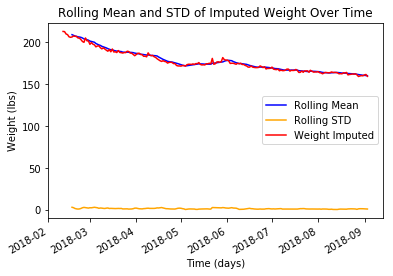

In [6]:
##-------------------------------------
## Step 5) Display Rolling mean and standard deviation along with data
##-------------------------------------
weight['Weight_Imputed_rm'] = weight['Weight_Imputed'].rolling(window=7).mean()
weight['Weight_Imputed_rs'] = weight['Weight_Imputed'].rolling(window=7).std()
ax4 = weight.plot(y='Weight_Imputed_rm',
                   title = 'Rolling Mean and STD of Imputed Weight Over Time',
                   color='blue')
ax4 = weight.plot(y='Weight_Imputed_rs',
                   color='orange',ax=ax4)
ax4 = weight.plot(y='Weight_Imputed',
                   color='red',ax=ax4)
ax4.set_xlabel('Time (days)')
ax4.set_ylabel('Weight (lbs)')
ax4.legend(["Rolling Mean", "Rolling STD","Weight Imputed"])
savefig('imputed_weight_rm_rs_im.png')

### Step 6) Implement Dicky-Fuller Hypothesis Test

In [7]:
##-------------------------------------
## Step 6) Implement Dicky-Fuller Hypothesis Test
##-------------------------------------
dftest = adfuller(weight['Weight_Imputed'], autolag = 'AIC')
index_names = ['Test Statistic', 'p-value', '# Lags Used', '# of Observations Used']

dfoutput = pd.Series(dftest[0:4],index = index_names)
for key, value in dftest[4].items():
    dfoutput['Critical vslue (%s)'%key] = value
    
print(dfoutput)

Test Statistic             -3.106236
p-value                     0.026095
# Lags Used                 7.000000
# of Observations Used    197.000000
Critical vslue (1%)        -3.463987
Critical vslue (5%)        -2.876326
Critical vslue (10%)       -2.574652
dtype: float64


### Step 7) Find the log of the weight and the rolling mean & std

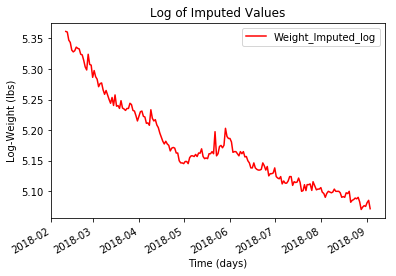

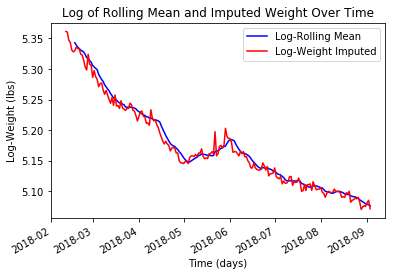

In [25]:
##-------------------------------------
## Step 7) Find the log of the weight and the rolling mean & std
##-------------------------------------
weight['Weight_Imputed_log'] = np.log(weight['Weight_Imputed'])
ax5 = weight.plot(y='Weight_Imputed_log',
                   title = 'Log of Imputed Values',
                   color='red')
ax5.set_xlabel('Time (days)')
ax5.set_ylabel('Log-Weight (lbs)')

savefig('log_imputed_weight.png')
weight['Weight_Imputed_log_rm'] = weight['Weight_Imputed_log'].rolling(window=7).mean()
weight['Weight_Imputed_log_rs'] = weight['Weight_Imputed_log'].rolling(window=7).std()
ax6 = weight.plot(y='Weight_Imputed_log_rm',
                   title = 'Log of Rolling Mean and Imputed Weight Over Time',
                   color='blue')
ax6 = weight.plot(y='Weight_Imputed_log',
                   color='red',ax=ax6)
ax6.set_xlabel('Time (days)')
ax6.set_ylabel('Log-Weight (lbs)')
ax6.legend(["Log-Rolling Mean", "Log-Weight Imputed"])
savefig('log_rollmean_log_imputed_weight_.png')

### Step 8) Remove Moving Average & Plot

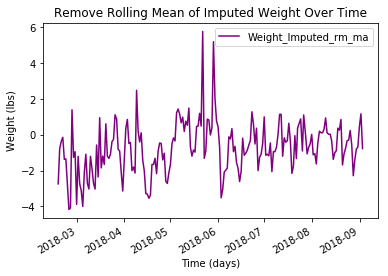

In [10]:
##-------------------------------------
## Step 8) Remove Moving Average & Plot
##-------------------------------------
movingaverage = weight['Weight_Imputed'].rolling(window=7).mean()
weight['Weight_Imputed_rm_ma'] = weight['Weight_Imputed'] - movingaverage

ax7 = weight.plot(y='Weight_Imputed_rm_ma',
                   title = 'Remove Rolling Mean of Imputed Weight Over Time',
                   color='purple')

ax7.set_xlabel('Time (days)')
ax7.set_ylabel('Weight (lbs)')
savefig('removed_rolling_mean_weight.png')

### Step 9) Methods to view autocorrelation

In [11]:
##-------------------------------------
## Step 9) Methods to view autocorrelation
##-------------------------------------
imputed_weight =  weight['Weight_Imputed']

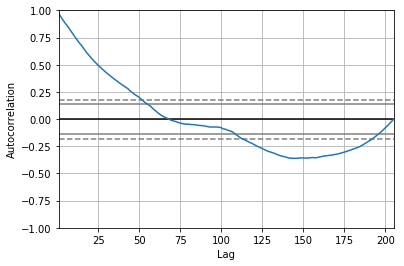

In [12]:
##-------------------------------------
## Step 9a: Method 1 to view autocorrelation
##-------------------------------------
## Method 1 (Provide Title)
autocorrelation_plot(imputed_weight)
savefig('Auto_correlation_method_1.png')

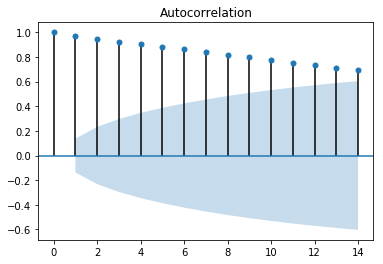

In [13]:
##-------------------------------------
## Step 9b: Method 2 to view autocorrelation
##-------------------------------------
## Method 2
plot_acf(imputed_weight, lags=14)
savefig('Auto_correlation_method_2.png')

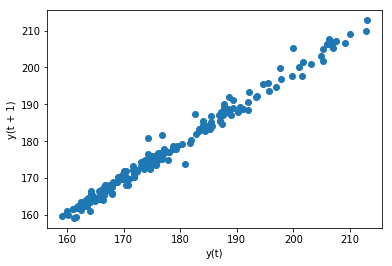

In [14]:
##-------------------------------------
## Step 9c: Method 3 to view autocorrelation
##-------------------------------------
## Method 3
lag_plot(imputed_weight)
savefig('Auto_correlation_method_3.png')

### Step 10) Autoregressive Model

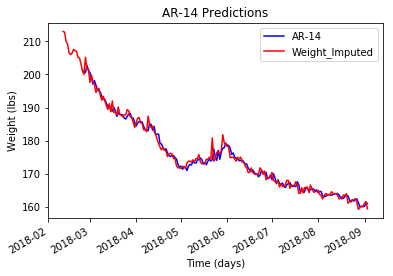

In [24]:
##-------------------------------------
## Step 10) Autoregressive Model
##-------------------------------------
# Train Autoregression Model 1
X = imputed_weight.tolist()
model_AR1 = AR(X)
model_fit_AR1 = model_AR1.fit()

## Best Lag Number
num_lag = model_fit_AR1.k_ar

## Missing Based on Lag number
miss_lag = np.full((num_lag), np.nan).tolist()
## Predict Autoregression Model 1
mf_AR1_predict = model_fit_AR1.predict(dynamic=False).tolist()
weight['predict_AR1'] =miss_lag + mf_AR1_predict


ax10 = weight.plot(y='predict_AR1',
                   title = 'AR-14 Predictions',
                   color='blue')
ax10 = weight.plot(y='Weight_Imputed',
                   color='red',ax=ax10)
ax10.set_xlabel('Time (days)')
ax10.set_ylabel('Weight (lbs)')
ax10.legend(['AR-14', 'Weight_Imputed'])
savefig('AutoRegressiveModel_2.png')

### Step 11) Fit Constant, Linear, and Exponential lines

In [17]:
##------------------------------------
## Step 11) Fit Constant, Linear, and Exponential lines
##------------------------------------

## Input for linear and exponential functions
x = np.linspace(0, weight.shape[0], weight.shape[0])
wgt = weight['Weight_Imputed']
y = wgt.tolist()

## Determine the linear and exponential fits
popt_line, pcov_line = curve_fit(line_func, x, y, p0=(1, 1e-6))
popt_expo, pcov_expo = curve_fit(expo_func, x, y, p0=(1, 1e-6, 1))

## Determine the expected values for constant, linear and exponential fits
## Constant Weight is the Average of the Weight
weight['constant_weight'] = weight['Weight'].mean()
## Linear Weight 
weight['linear_weight'] = line_func(x, *popt_line)
## Exponential Weight 
weight['exponential_weight'] = expo_func(x, *popt_expo)

### Step 12) Graph AR14, Imputed, Constant, Linear, and Exponential lines

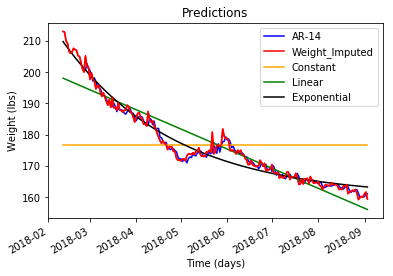

In [21]:
##------------------------------------
## Step 12) Graph AR14, Imputed,
## Constant, Linear, and Exponential lines
##------------------------------------

ax11 = weight.plot(y='predict_AR1',
                   title = 'Predictions',
                   color='blue')
ax11 = weight.plot(y='Weight_Imputed',
                   color='red',ax=ax11)
ax11 = weight.plot(y='constant_weight',
                   color='orange',ax=ax11)
ax11 = weight.plot(y='linear_weight',
                   color='green',ax=ax11)
ax11 = weight.plot(y='exponential_weight',
                   color='black',ax=ax11)

ax11 = weight.plot(y='Weight_Imputed',
                   color='red',ax=ax11)
ax11.set_xlabel('Time (days)')
ax11.set_ylabel('Weight (lbs)')
ax11.legend(['AR-14', 'Weight_Imputed','Constant','Linear','Exponential'])
savefig('AllModels_2.png')

## Plot point types
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html

